<a href="https://colab.research.google.com/github/Divyansh10-wd/GENAI/blob/main/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

In [3]:
np.random.seed(42)
tf.random.set_seed(42)

In [4]:
dataset=tf.keras.datasets.mnist

In [5]:
(x_train,_),(x_test,_)=dataset.load_data()
print(f"Original Shape {x_train.shape} - {x_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Original Shape (60000, 28, 28) - (10000, 28, 28)


In [6]:
x_train=x_train/255
x_test=x_test/255

In [7]:
H=28
W=28
C=1

In [8]:
x_train=np.reshape(x_train,(-1,H*W*C))
x_test=np.reshape(x_test,(-1,H*W*C))
print(f"Flatten shape: {x_train.shape}-{x_test.shape}")

Flatten shape: (60000, 784)-(10000, 784)


In [16]:
latent_dim=32

In [17]:
###AUTOENCODER
inputs=Input(shape=(H*W,))
h=Dense(latent_dim,activation='relu')(inputs)
outputs=Dense(H*W,activation='sigmoid')(h)
autoencoder=Model(inputs,outputs)

In [18]:
autoencoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 784)            │        25,872 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,992 (199.19 KB)

 Trainable params: 50,992 (199.19 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
autoencoder.compile(optimizer=Adam(1e-3),loss='binary_crossentropy')

In [23]:
## Training the autoencoder
autoencoder.fit(x_train,x_train,epochs=50,batch_size=256,validation_data=(x_test,x_test))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.3877 - val_loss: 0.1861
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1779 - val_loss: 0.1534
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1492 - val_loss: 0.1331
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1311 - val_loss: 0.1206
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.1197 - val_loss: 0.1124
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1121 - val_loss: 0.1066
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1068 - val_loss: 0.1024
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1029 - val_loss: 0.0994
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.1001 - val_loss: 0.0972
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0981 - val_loss: 0.0957
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0967 - val_loss: 0.0947
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3

In [24]:
test_pred_y=autoencoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


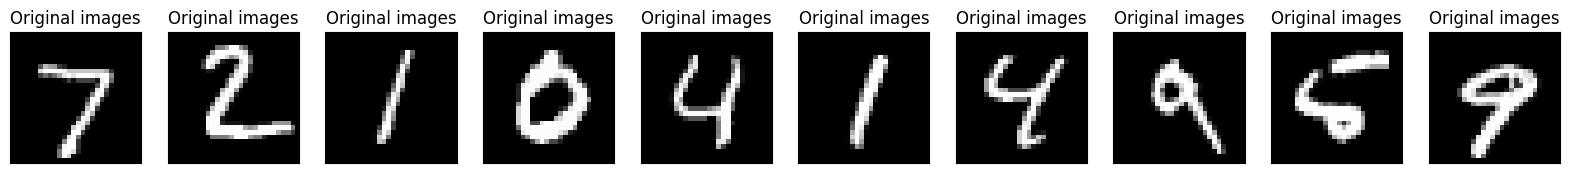

In [26]:
n=10
plt.figure(figsize=(20,4))
for i in range(10):
  ##DIsplay original
  ax=plt.subplot(2,n,i+1)
  ax.set_title("Original images")
  plt.imshow(x_test[i].reshape(H,W))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)


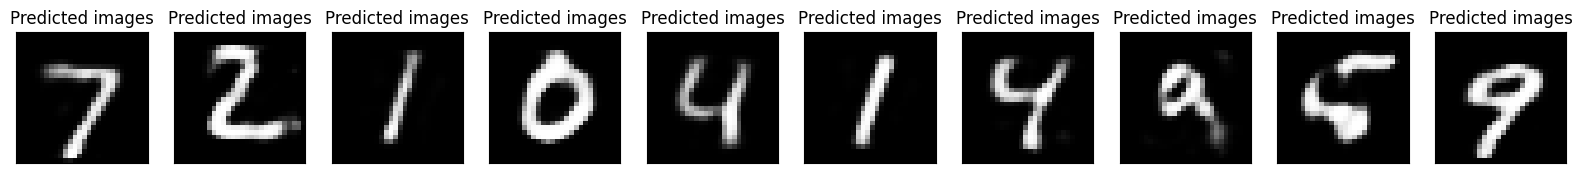

In [29]:
## Predicted
n=10
plt.figure(figsize=(20,4))
for i in range(10):
  ax=plt.subplot(2,n,i+1+n)
  ax.set_title("Predicted images")
  plt.imshow(test_pred_y[i].reshape(H,W))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

